In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
import os
import time
import sklearn
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
from random import random
from tabulate import tabulate
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import ExtraTreeClassifier
from contextlib import redirect_stdout
evaluate={'Acc':"Accuracy", 'b_Acc':"Balanced Accuracy", 'F1':"F1 Score", 'kap':"Kappa", 'ROC':"Roc"}

In [37]:
saat=time.time()

In [38]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [39]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

files_add=find_the_way("./",".csv")
files_add

['./session-1-DeviceGroup-1.csv',
 './session-1-DeviceGroup-2.csv',
 './session-2-DeviceGroup-1.csv',
 './session-2-DeviceGroup-2.csv',
 './results\\compare\\CV\\DT_CS1D1_ACK Flag Cnt.csv',
 './results\\compare\\CV\\DT_CS1D1_Active Max.csv',
 './results\\compare\\CV\\DT_CS1D1_Active Mean.csv',
 './results\\compare\\CV\\DT_CS1D1_Active Min.csv',
 './results\\compare\\CV\\DT_CS1D1_Active Std.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd Blk Rate Avg.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd Header Len.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd IAT Max.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd IAT Mean.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd IAT Min.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd IAT Std.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd IAT Tot.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd Pkt Len Max.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd Pkt Len Mean.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd Pkt Len Min.csv',
 './results\\compare\\CV\\DT_CS1D1_Bwd Pkt Len St

In [40]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier    
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import  ComplementNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from sklearn import datasets
import sklearn
import time


from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import randint as sp_randFloat
import xgboost
from catboost import CatBoostClassifier

In [41]:
ml_list={"DT": DecisionTreeClassifier(),
         "LR": LogisticRegression(),
         "BNB": BernoulliNB(),
       
         "XGB": xgboost.XGBClassifier(),
         "kNN": KNeighborsClassifier(),
         "GNB": GaussianNB(),
           "MLP": MLPClassifier(),"SVM": SVC()}

ml_list={"ET":ExtraTreeClassifier(),
"DT":DecisionTreeClassifier(),
#"OneClassSVM":OneClassSVM(),
#"MLPClassifier":MLPClassifier(),
#"ComplementNB":ComplementNB(),
###################"DummyClassifier":DummyClassifier(),         
#"RadiusNeighborsClassifier":RadiusNeighborsClassifier(),
#"KNeighborsClassifier":KNeighborsClassifier(),
#"ClassifierChain":ClassifierChain(base_estimator=DecisionTreeClassifier()),
#"MultiOutputClassifier":MultiOutputClassifier(estimator=DecisionTreeClassifier()),
#####################"OutputCodeClassifier":OutputCodeClassifier(estimator=DecisionTreeClassifier()),
#"OneVsOneClassifier":OneVsOneClassifier(estimator=DecisionTreeClassifier()),
#########################"OneVsRestClassifier":OneVsRestClassifier(estimator=DecisionTreeClassifier()),
#"SGDClassifier":SGDClassifier(),
#######################################"RidgeClassifierCV":RidgeClassifierCV(),
"Ridge":RidgeClassifier(),
############################"PassiveAggressiveClassifier    ":PassiveAggressiveClassifier    (),
#"GaussianProcessClassifier":GaussianProcessClassifier(),
#"AdaBoostClassifier":AdaBoostClassifier(),
#"GradientBoostingClassifier":GradientBoostingClassifier(),
"Bagg":BaggingClassifier(),
"ETs":ExtraTreesClassifier(),
"RF":RandomForestClassifier(),
"BNB":BernoulliNB(),
##############"CalibratedClassifierCV":CalibratedClassifierCV(),
"GNB":GaussianNB(),
#"LabelPropagation":LabelPropagation(),
#"LabelSpreading":LabelSpreading(),
"LDA":LinearDiscriminantAnalysis(),
#"LinearSVC":LinearSVC(),
"LR":LogisticRegression(),
#"LogisticRegressionCV":LogisticRegressionCV(),
#"MultinomialNB  ":MultinomialNB  (),
#########################################"NearestCentroid":NearestCentroid(),
#"NuSVC":NuSVC(),
##############################################"Perceptron":Perceptron(),
"QDA":QuadraticDiscriminantAnalysis()}
#"SVC":SVC(),    #  "XGB": xgboost.XGBClassifier(),
         #"cat":CatBoostClassifier(),
#"HistGradientBoostingClassifier":HistGradientBoostingClassifier()}
#"CategoricalNB" : CategoricalNB()}

ml_list={"DT": DecisionTreeClassifier(),
       "Bagg":BaggingClassifier()}
ml_list={"DT": DecisionTreeClassifier()}

In [42]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    return target_names

In [43]:
folder("results/compare/SS/")
folder("results/compare/CV/")
folder("results/compare/DD/")
folder("pdfs")

## Calculation of evaluations

In [44]:
def score(train_time,test_time,predict,y_test,class_based_results,repeat,cv,dname,ml,sw):
    train_time=train_time[0]
    test_time=test_time[0]
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")     
    accuracy=sklearn.metrics.accuracy_score(y_test, predict)
    accuracy_b=sklearn.metrics.balanced_accuracy_score( y_test,predict)
    kappa=sklearn.metrics.cohen_kappa_score(y_test, predict,labels=None, weights=None, sample_weight=None)
    try:
        roc=sklearn.metrics.roc_auc_score(y_test, predict)
    except:roc=0
    report = sklearn.metrics.classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    line=[dname,sw,repeat,cv,ml,accuracy,accuracy_b,pr,rc,f_1,kappa,roc,train_time,test_time]

    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    return class_based_results,line

In [45]:
def ML(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=5
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Feature","Dataset","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):
                #try:

                    df = pd.read_csv(loop1,usecols=cols)#,header=None )
                    df=df.fillna(0)
                    X_train =df[df.columns[0:-1]]
                    X_train=np.array(X_train)
                    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
                    y_train=df[df.columns[-1]].cat.codes  
    
    
                    df = pd.read_csv(loop2,usecols=cols)#,header=None )
                    df=df.fillna(0)
                    X_test =df[df.columns[0:-1]]
                    X_test=np.array(X_test)
                    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
                    y_test=df[df.columns[-1]].cat.codes  
    
    
                    #dname=loop1  [6:-13]  
                    results_y=[]
           
                    results_y.append(y_test)
    
    
                    precision=[]
                    recall=[]
                    f1=[]
                    accuracy=[]
                    train_time=[]
                    test_time=[]
                    total_time=[]
                    kappa=[]
                    accuracy_b=[]
    
                        #machine learning algorithm is applied in this section
                    clf = ml_list[ii]#choose algorithm from ml_list dictionary
                    second=time.time()
                    clf.fit(X_train, y_train)
                    train_time.append(float((time.time()-second)) )
                    second=time.time()
                    predict =clf.predict(X_test)
                    test_time.append(float((time.time()-second)) )
        
                    altime=0
                    class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                    lines.append(line)
                #except:pass
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        #print(results)
        del results["Feature"]
        del results["Dataset"]
        del results["ML"]
        del results["T"]
        del results["CV"]
        del results["ROC"]
        #print(results)
        results=results.mean()
        results=results.round(3)
        list1 = [train,cols[0][:15],ii]
        list1.extend(list(results.values))
  
        
        print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero, list1[0],
            list1[1],   
            list1[2][:5],
            list1[3],
            list1[4],
            list1[5],   
            list1[6],
            list1[7],
            list1[8],
            list1[9],   
            list1[10]))

        #print (tabulate(results, headers=list(results.columns)))
        #print()






In [12]:
def ML_CV(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=1
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Feature","Dataset","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):
            rnd = random()
            kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            ##df = df.reset_index(drop=True)
            df=df.fillna(0)

            #del df["MAC"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            X.shape
            for train_index, test_index in kfold.split(X):
                try:
                    X_train, X_test = X[train_index], X[test_index]
                    y_train, y_test = y[train_index], y[test_index]  
    
                    #dname=loop1  [6:-13]  
                    results_y=[]
                    cv+=1
                    results_y.append(y_test)
    
    
                    precision=[]
                    recall=[]
                    f1=[]
                    accuracy=[]
                    train_time=[]
                    test_time=[]
                    total_time=[]
                    kappa=[]
                    accuracy_b=[]
    
                        #machine learning algorithm is applied in this section
                    clf = ml_list[ii]#choose algorithm from ml_list dictionary
                    second=time.time()
                    clf.fit(X_train, y_train)
                    train_time.append(float((time.time()-second)) )
                    second=time.time()
                    predict =clf.predict(X_test)
                    test_time.append(float((time.time()-second)) )
        
                    altime=0
                    class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                    lines.append(line)
                except:pass
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        #print(results)
        del results["Feature"]
        del results["Dataset"]
        del results["ML"]
        del results["T"]
        del results["CV"]
        del results["ROC"]
        #print(results)
        results=results.mean()
        results=results.round(3)
        list1 = [file_list[loop1],cols[0][:15],ii]
        list1.extend(list(results.values))
  
        
        print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero, list1[0],
            list1[1],   
            list1[2][:5],
            list1[3],
            list1[4],
            list1[5],   
            list1[6],
            list1[7],
            list1[8],
            list1[9],   
            list1[10]))

        #print (tabulate(results, headers=list(results.columns)))
        #print()






In [13]:
features=['Flow ID',
 'Src IP',
 'Src Port',
 'Dst IP',
 'Dst Port',
 'Protocol',
 'Timestamp',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Std',
 'Idle Max',
 'Idle Min']


feature_Errors=[]
print(len(features))

83


In [14]:
file_list={'./session-1-DeviceGroup-1.csv':"CS1D1",
 './session-1-DeviceGroup-2.csv':"CS1D2",
 './session-2-DeviceGroup-1.csv':"CS2D1",
 './session-2-DeviceGroup-2.csv':"CS2D2"}

# CV

In [15]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(train,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/CV/ML_{file_list[train]}_{dname}.csv"
            #print(f"{list[train]} Dataset - Feature {number+1}/{len(features)}")
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            ML_CV(train,"",output_csv,feature,dname,file_list[train])
            
        except:
            feature_Errors.append(dname)
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorCV.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {list[train]} Dataset - Feature {dname}")
                    df = pd.read_csv(train,usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")

No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   CS1D1      Flow ID         DT         nan        nan        nan        nan        nan        nan        nan        nan       
001   CS1D1      Src IP          DT         nan        nan        nan        nan        nan        nan        nan        nan       
002   CS1D1      Src Port        DT         0.892      0.69       0.737      0.69       0.698      0.852      0.011      0.006     
003   CS1D1      Dst IP          DT         nan        nan        nan        nan        nan        nan        nan        nan       
004   CS1D1      Dst Port        DT         0.586      0.401      0.457      0.401      0.371      0.469      0.003      0.0       
005   CS1D1      Protocol        DT         0.451      0.107      0.113      0.107      0.095      0.142      0.0        0.0       
006   CS1D1      Timestamp       DT         nan        nan        nan       

In [16]:
feature_Errors

['Flow Byts/s',
 'Flow Pkts/s',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg']

In [17]:
time.time()-saat

112.99885034561157

# Session vs Session

In [18]:
file_list={"SD1":['./small/session-1-DeviceGroup-1.csv','./small/session-2-DeviceGroup-1.csv'],
"SD1T":['./small/session-2-DeviceGroup-1.csv','./small/session-1-DeviceGroup-1.csv'],
"SD2":['./small/session-1-DeviceGroup-2.csv','./small/session-2-DeviceGroup-2.csv'],
"SD2T":['./small/session-2-DeviceGroup-2.csv','./small/session-1-DeviceGroup-2.csv']}


In [19]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(file_list[train][0],usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/SS/ML_{train}_{dname}.csv"
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            temp=ML(file_list[train][0],file_list[train][1],output_csv,feature,dname,train)  
        except:
            feature_Errors.append(dname)
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorSS.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {train} Dataset - Feature {dname}")
                    print("TRAIN")
                    df = pd.read_csv(file_list[train][0],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("TEST")
                    df = pd.read_csv(file_list[train][1],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")


No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   err        Flow ID         err        err        err        err        err        err        err        err        err       
001   err        Src IP          err        err        err        err        err        err        err        err        err       
002   SD1        Src Port        DT         0.713      0.375      0.413      0.375      0.379      0.577      0.024      0.002     
003   err        Dst IP          err        err        err        err        err        err        err        err        err       
004   SD1        Dst Port        DT         0.445      0.361      0.336      0.361      0.286      0.313      0.002      0.003     
005   SD1        Protocol        DT         0.543      0.128      0.14       0.128      0.115      0.262      0.002      0.001     
006   err        Timestamp       err        err        err        err       

In [20]:
feature_Errors

['Flow Byts/s',
 'Flow Pkts/s',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Flow ID',
 'Src IP',
 'Dst IP',
 'Timestamp',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Flow ID',
 'Src IP',
 'Dst IP',
 'Timestamp',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Bwd 

In [21]:
time.time()-saat

640.548314332962

# Device vs Device

In [22]:
file_list={"DD1":['./small/session-1-DeviceGroup-1.csv','./small/session-2-DeviceGroup-2.csv'],
"DD1T":['./small/session-2-DeviceGroup-2.csv','./small/session-1-DeviceGroup-1.csv'],
"DD2":['./small/session-2-DeviceGroup-1.csv','./small/session-1-DeviceGroup-2.csv'],
"DD2T":['./small/session-1-DeviceGroup-2.csv','./small/session-2-DeviceGroup-1.csv']}

In [23]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(file_list[train][0],usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/DD/ML_{train}_{dname}.csv"
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            temp=ML(file_list[train][0],file_list[train][1],output_csv,feature,dname,train)  
        except:
            feature_Errors.append(dname)
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorDD.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {train} Dataset - Feature {dname}")
                    print("TRAIN")
                    df = pd.read_csv(file_list[train][0],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("TEST")
                    df = pd.read_csv(file_list[train][1],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")



No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   err        Flow ID         err        err        err        err        err        err        err        err        err       
001   err        Src IP          err        err        err        err        err        err        err        err        err       
002   DD1        Src Port        DT         0.572      0.193      0.183      0.193      0.164      0.219      0.019      0.002     
003   err        Dst IP          err        err        err        err        err        err        err        err        err       
004   DD1        Dst Port        DT         0.362      0.356      0.369      0.356      0.277      0.24       0.004      0.001     
005   DD1        Protocol        DT         0.558      0.149      0.151      0.149      0.107      0.197      0.003      0.002     
006   err        Timestamp       err        err        err        err       

In [24]:
time.time()-saat

1155.2633051872253

In [25]:
set(feature_Errors)

{'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Dst IP',
 'Flow Byts/s',
 'Flow ID',
 'Flow Pkts/s',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Pkts/s',
 'Src IP',
 'Timestamp'}

# # Some analysis and graphs for feature elimination

In [12]:
csv_results={}
for f in ["CV","SS","DD"]:
    files_add=find_the_way(f"./results\\compare\\{f}",".csv")
    csv_results[f]=[]
    for i in files_add:
        temp=i.replace("\\","/")
        temp=temp.split("_")
        if f"_{temp[1]}_" not in csv_results[f]:
            csv_results[f].append(f"_{temp[1]}_" )

In [13]:
csv_results={'CV': ['_CS1D1_', '_CS1D2_', '_CS2D1_', '_CS2D2_'],
 'SS': ['_SD1T_', '_SD1_', '_SD2T_', '_SD2_'],
 'DD': ['_DD1T_', '_DD1_', '_DD2T_', '_DD2_']}

In [14]:
for f in csv_results:
    folder(f"./results/mean/{f}/")
    for s in csv_results[f]:
        results=[['Feature', 'Dataset', "Folder", 'T', 'CV', 'Acc', 'b_Acc', 'Prec', 'Rec',
       'F1', 'kap', 'ROC', 'tra-T', 'test-T']]
        temp=find_the_way(f"./results/compare/{f}",s)
        files_add=[]
        for i in temp:
            files_add.append(i.replace("\\","/"))
            
            
        for i in tqdm(files_add):
            df=pd.read_csv(i)

            temp=df.values
            df = df.apply(pd.to_numeric, errors='coerce')
            df=df.mean()

            df = df.dropna()
            try:
                temp=list(temp[0][:2])
            except:
                temp=[i[i.find(s)+len(s)+1:-4]]
                temp.append(s)
            temp.append(f)
            temp.extend(list(df.values))
            results.append(temp)
        results = pd.DataFrame (results[1:], columns = results[0])
        results.to_csv(f"./results/mean/{f}/{s[1:-1]}.csv",index=False)
        

100%|█████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 251.50it/s]


In [15]:
csv_results={'CV': ['_CS1D1_', '_CS1D2_', '_CS2D1_', '_CS2D2_'],
 'SS': ['_SD1T_', '_SD1_', '_SD2T_', '_SD2_'],
 'DD': ['_DD1T_', '_DD1_', '_DD2T_', '_DD2_']}

In [16]:
flag=1
totaldf=pd.DataFrame()
for i in csv_results:
    tempdf=pd.DataFrame()
    files_add=find_the_way(f"./results/mean/{i}",".csv")
    for n, ii in enumerate(files_add):
        df=pd.read_csv(ii,usecols=["Feature","kap"])
        if flag:
            totaldf["Feature"]=df["Feature"]
            flag=0
        del df["Feature"]
        tempdf[f"{i}_{n}"]=df["kap"]
    totaldf[i]=tempdf.mean(axis=1)
totaldf




,Feature,CV,SS,DD
0,ACK Flag Cnt,0.010479,0.022934,0.012371
1,Active Max,0.360035,0.223899,0.168663
2,Active Mean,0.362229,0.224985,0.162231
3,Active Min,0.355561,0.218723,0.163808
4,Active Std,0.186959,0.102908,0.065422
...,...,...,...,...
69,Tot Bwd Pkts,0.347651,0.000000,0.000000
70,Tot Fwd Pkts,0.445871,NaN,NaN
71,TotLen Bwd Pkts,0.724707,NaN,NaN
72,TotLen Fwd Pkts,0.749987,NaN,NaN


In [17]:
cleandf=[list(totaldf.columns)]
limit=0.0001
for i in totaldf.values:
    if (math.isnan(i[1]) and math.isnan(i[2]) and math.isnan(i[3]) ) or (i[1]<limit and i[2]<limit  and i[3]<limit   ):
        print(i)
    else:
        cleandf.append(list(i))
cleandf = pd.DataFrame (cleandf[1:], columns = cleandf[0])   
print(len(cleandf))
cleandf

['Bwd Blk Rate Avg' 0.0 0.0 0.0]
['Bwd URG Flags' 0.0 0.0 0.0]
['CWE Flag Count' 0.0 0.0 0.0]
['ECE Flag Cnt' 0.0 -0.002458918167479007 -0.0075090915881688]
['Fwd PSH Flags' 0.0 0.0 0.0]
69


,Feature,CV,SS,DD
0,ACK Flag Cnt,0.010479,0.022934,0.012371
1,Active Max,0.360035,0.223899,0.168663
2,Active Mean,0.362229,0.224985,0.162231
3,Active Min,0.355561,0.218723,0.163808
4,Active Std,0.186959,0.102908,0.065422
...,...,...,...,...
64,Tot Bwd Pkts,0.347651,0.000000,0.000000
65,Tot Fwd Pkts,0.445871,NaN,NaN
66,TotLen Bwd Pkts,0.724707,NaN,NaN
67,TotLen Fwd Pkts,0.749987,NaN,NaN


In [18]:
cleandf.head(20)

,Feature,CV,SS,DD
0,ACK Flag Cnt,0.010479,0.022934,0.012371
1,Active Max,0.360035,0.223899,0.168663
2,Active Mean,0.362229,0.224985,0.162231
3,Active Min,0.355561,0.218723,0.163808
4,Active Std,0.186959,0.102908,0.065422
5,Bwd Header Len,0.458384,0.278990,0.176226
6,Bwd IAT Max,0.446394,0.301311,0.203411
7,Bwd IAT Mean,0.454910,0.353331,0.243188
8,Bwd IAT Min,0.360896,0.247109,0.194309
9,Bwd IAT Std,0.411423,0.346562,0.235409


In [19]:
cleandf

,Feature,CV,SS,DD
0,ACK Flag Cnt,0.010479,0.022934,0.012371
1,Active Max,0.360035,0.223899,0.168663
2,Active Mean,0.362229,0.224985,0.162231
3,Active Min,0.355561,0.218723,0.163808
4,Active Std,0.186959,0.102908,0.065422
...,...,...,...,...
64,Tot Bwd Pkts,0.347651,0.000000,0.000000
65,Tot Fwd Pkts,0.445871,NaN,NaN
66,TotLen Bwd Pkts,0.724707,NaN,NaN
67,TotLen Fwd Pkts,0.749987,NaN,NaN


In [20]:
ii[1]

'/'

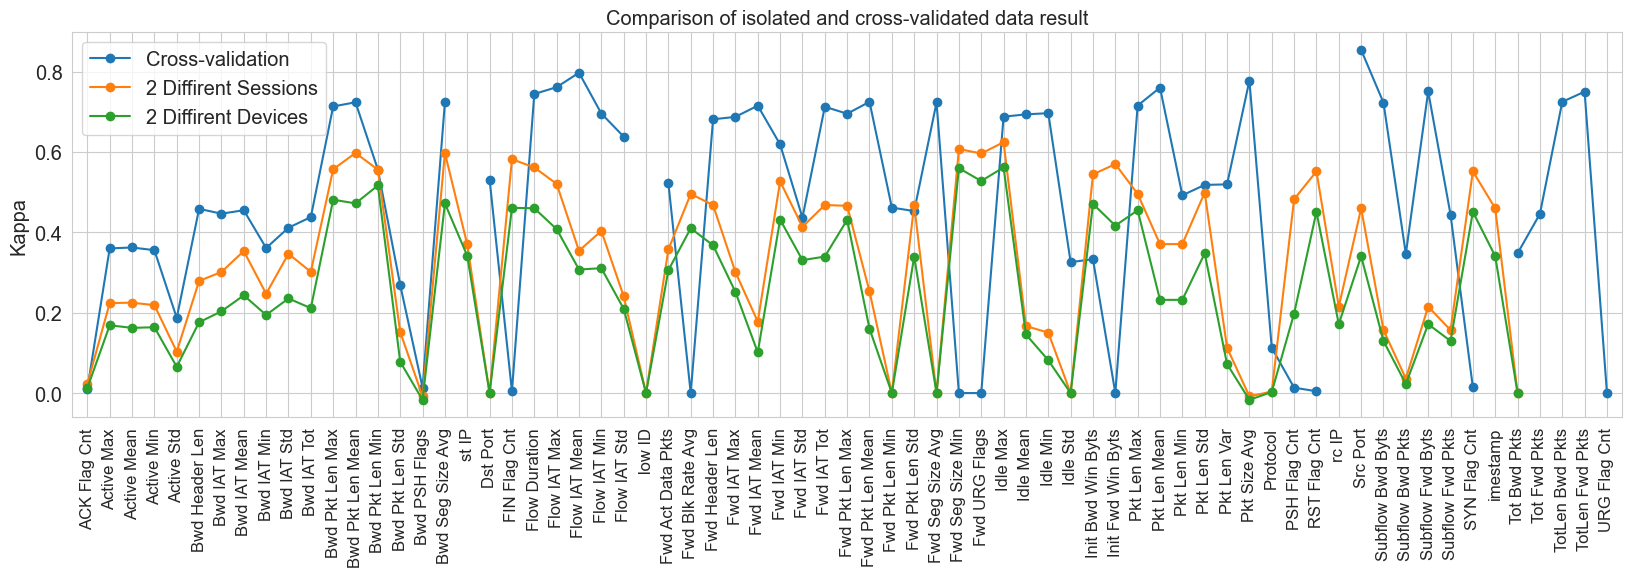

In [22]:
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
import matplotlib.pylab as pylab
sns.set_style("whitegrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
graph_size=100
for size in range(0,len(cleandf),graph_size):
    df = cleandf.iloc[size:size+graph_size,:]
    for i in method: 
            graph_name=f"./pdfs/Comparison_kappa(3)_{i}_{size}.pdf"
            plt.margins(x=0.01)
            my_xticks=df["Feature"]#list(iso.index)
            pylab.rcParams.update(params)
            #plt.figure(figsize=(10,10))
            #plt.plot(my_xticks,iso['Acc'], linestyle='--', marker='.', color='b',label= "Separate Train & Test acc")
            #plt.plot(my_xticks,cv['Acc'], linestyle='--', marker='.', color='r',label= "10-Fold CV acc")
            plt.plot(my_xticks,df[i], linestyle='-', marker='o',label= method[i])
    plt.title(f"Comparison of isolated and cross-validated data result")
    plt.legend(numpoints=1)
    #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.ylabel("Kappa")
    plt.xticks(rotation=90) 
    #plt.ylim([0.69, 0.71]) 
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
        
    

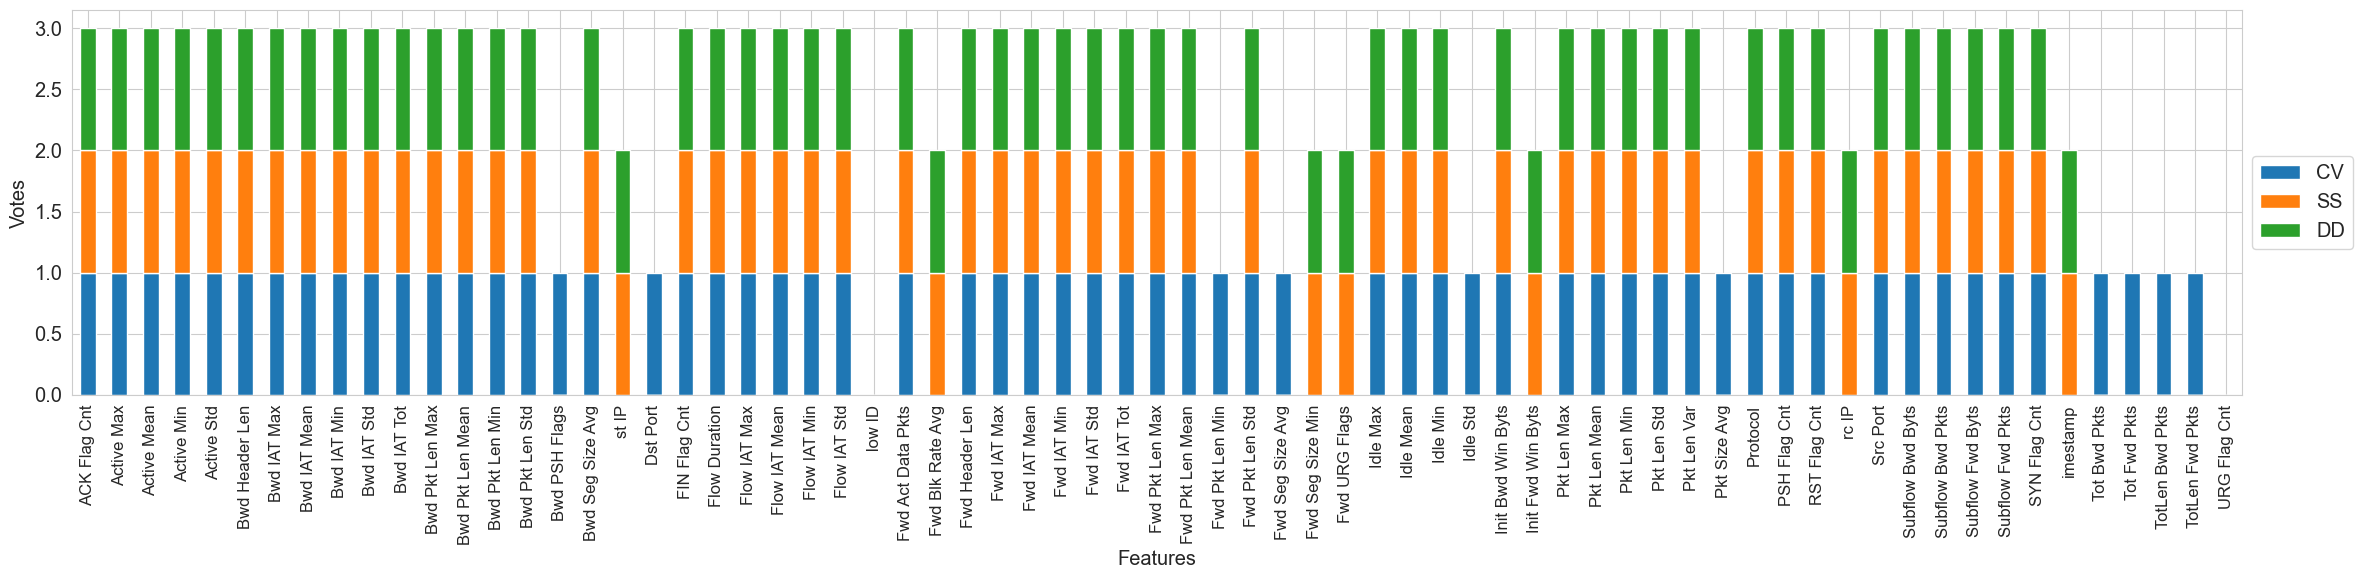

In [23]:
limit=0.00000001
for c in cleandf.columns[1:]:
    cleandf[c]=cleandf[c]>=limit
    cleandf[c]=cleandf[c].astype(int)
cleandf=cleandf.set_index("Feature")
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
graph_size=100
for size in range(0,len(cleandf),graph_size):
    graph_name=f"./pdfs/kappa_Voting3_{size}.PDF"
    df = cleandf.iloc[size:size+graph_size,:]
    df.plot.bar(stacked=True,figsize=(28,5))#,color=list(colors.values()))
    plt.xlabel('Features')
    plt.ylabel('Votes')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()

# 12 Vote System

In [61]:
newnames={'CV-CS1D1':'CV-S1D1', 'CV-CS1D2':'CV-S1D2', 'CV-CS2D1': 'CV-S2D1', 'CV-CS2D2':'CV-S2D2', 
 
 'DD-DD1':"DD-S1D1S2D2",'DD-DD1T':"DD-S2D2S1D1", 'DD-DD2':"DD-S2D1S1D2", 'DD-DD2T':"DD-S1D2S2D1",
           'SS-SD1':'SS-S1S2D1', 'SS-SD1T':'SS-S2S1D1', 'SS-SD2':'SS-S1S2D2','SS-SD2T':'SS-S2S1D2'
         }


In [62]:
files_add=find_the_way("./results/mean",".csv")
files_add

['./results/mean\\CV\\CS1D1.csv',
 './results/mean\\CV\\CS1D2.csv',
 './results/mean\\CV\\CS2D1.csv',
 './results/mean\\CV\\CS2D2.csv',
 './results/mean\\DD\\DD1.csv',
 './results/mean\\DD\\DD1T.csv',
 './results/mean\\DD\\DD2.csv',
 './results/mean\\DD\\DD2T.csv',
 './results/mean\\SS\\SD1.csv',
 './results/mean\\SS\\SD1T.csv',
 './results/mean\\SS\\SD2.csv',
 './results/mean\\SS\\SD2T.csv']

In [63]:
files_add=['./results/mean\\CV\\CS1D1.csv',
 './results/mean\\CV\\CS1D2.csv',
 './results/mean\\CV\\CS2D1.csv',
 './results/mean\\CV\\CS2D2.csv',
 './results/mean\\SS\\SD1.csv',
 './results/mean\\SS\\SD1T.csv',
 './results/mean\\SS\\SD2.csv',
 './results/mean\\SS\\SD2T.csv',
           './results/mean\\DD\\DD1.csv',
 './results/mean\\DD\\DD1T.csv',
 './results/mean\\DD\\DD2.csv',
 './results/mean\\DD\\DD2T.csv']

In [64]:
flag=1
df12vote=pd.DataFrame()
for i in files_add:
    name=i.replace("\\","/")
    name=name.replace("/","-")
    name=name[15:-4]
    df=pd.read_csv(i,usecols=["Feature","kap"])
    if flag:
        df12vote["Feature"]=df["Feature"]
        flag=0
    del df["Feature"]
    df12vote[newnames[name]]=df["kap"]
df12vote


,Feature,CV-S1D1,CV-S1D2,CV-S2D1,CV-S2D2,SS-S1S2D1,SS-S2S1D1,SS-S1S2D2,SS-S2S1D2,DD-S1D1S2D2,DD-S2D2S1D1,DD-S2D1S1D2,DD-S1D2S2D1
0,ACK Flag Cnt,0.041916,0.000000,0.000000,0.000000,0.091738,0.000000,0.000000,0.000000,0.049485,0.000000,0.000000,0.000000
1,Active Max,0.255613,0.358948,0.331854,0.493725,0.138129,0.169794,0.256776,0.330897,0.099223,0.133156,0.307081,0.135195
2,Active Mean,0.258077,0.350150,0.350808,0.489881,0.148897,0.177360,0.249552,0.324131,0.101473,0.124839,0.300338,0.122273
3,Active Min,0.275849,0.363416,0.289237,0.493743,0.137536,0.150519,0.251993,0.334845,0.093458,0.121277,0.313701,0.126794
4,Active Std,0.125107,0.176193,0.176188,0.270347,0.062375,0.099590,0.088815,0.160851,0.047384,0.062356,0.144810,0.007139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Tot Bwd Pkts,0.285249,0.336093,0.301146,0.468114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
70,Tot Fwd Pkts,0.436084,0.489520,0.354868,0.503012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,TotLen Bwd Pkts,0.732445,0.739929,0.721549,0.704906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,TotLen Fwd Pkts,0.770005,0.745351,0.777040,0.707551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
cols=list(df12vote.columns)[1:]
cleandf=[list(df12vote.columns)]
limit=0.00000001
for i in df12vote.values:
    flag=1
    if all(p != p for p in i[1:]):
        flag=0
    if all(v <= limit for v in i[1:]):
        flag=0

    if flag:
        cleandf.append(list(i))
cleandf = pd.DataFrame (cleandf[1:], columns = cleandf[0])   
print(len(cleandf))
cleandf

69


,Feature,CV-S1D1,CV-S1D2,CV-S2D1,CV-S2D2,SS-S1S2D1,SS-S2S1D1,SS-S1S2D2,SS-S2S1D2,DD-S1D1S2D2,DD-S2D2S1D1,DD-S2D1S1D2,DD-S1D2S2D1
0,ACK Flag Cnt,0.041916,0.000000,0.000000,0.000000,0.091738,0.000000,0.000000,0.000000,0.049485,0.000000,0.000000,0.000000
1,Active Max,0.255613,0.358948,0.331854,0.493725,0.138129,0.169794,0.256776,0.330897,0.099223,0.133156,0.307081,0.135195
2,Active Mean,0.258077,0.350150,0.350808,0.489881,0.148897,0.177360,0.249552,0.324131,0.101473,0.124839,0.300338,0.122273
3,Active Min,0.275849,0.363416,0.289237,0.493743,0.137536,0.150519,0.251993,0.334845,0.093458,0.121277,0.313701,0.126794
4,Active Std,0.125107,0.176193,0.176188,0.270347,0.062375,0.099590,0.088815,0.160851,0.047384,0.062356,0.144810,0.007139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Tot Bwd Pkts,0.285249,0.336093,0.301146,0.468114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
65,Tot Fwd Pkts,0.436084,0.489520,0.354868,0.503012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,TotLen Bwd Pkts,0.732445,0.739929,0.721549,0.704906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,TotLen Fwd Pkts,0.770005,0.745351,0.777040,0.707551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
colors={'CV-CS1D1':"#0049C6", 'CV-CS1D2':"#0069C6", 'CV-CS2D1':"#0099C6", 'CV-CS2D2':"#00A9C6", 
      
        'SS-SD1':"#FF5733", 'SS-SD1T':"#DA5733", 'SS-SD2':"#BF5733",'SS-SD2T':"#CF5733",  'DD-DD1':"#00A603",'DD-DD1T':"#00C603", 'DD-DD2':"#00E603", 'DD-DD2T':"#00F603"}

colors={
'CV-S1D1':"#0049C6",
 'CV-S1D2':"#0069C6",
 'CV-S2D1':"#0099C6",
 'CV-S2D2':"#00A9C6",
 'SS-S1S2D1':"#FF5733",
 'SS-S2S1D1':"#DA5733",
 'SS-S1S2D2':"#BF5733",
 'SS-S2S1D2':"#CF5733", 'DD-S1D1S2D2':"#00A603",
 'DD-S2D2S1D1':"#00C603",
 'DD-S2D1S1D2':"#00E603",
 'DD-S1D2S2D1':"#00F603"}

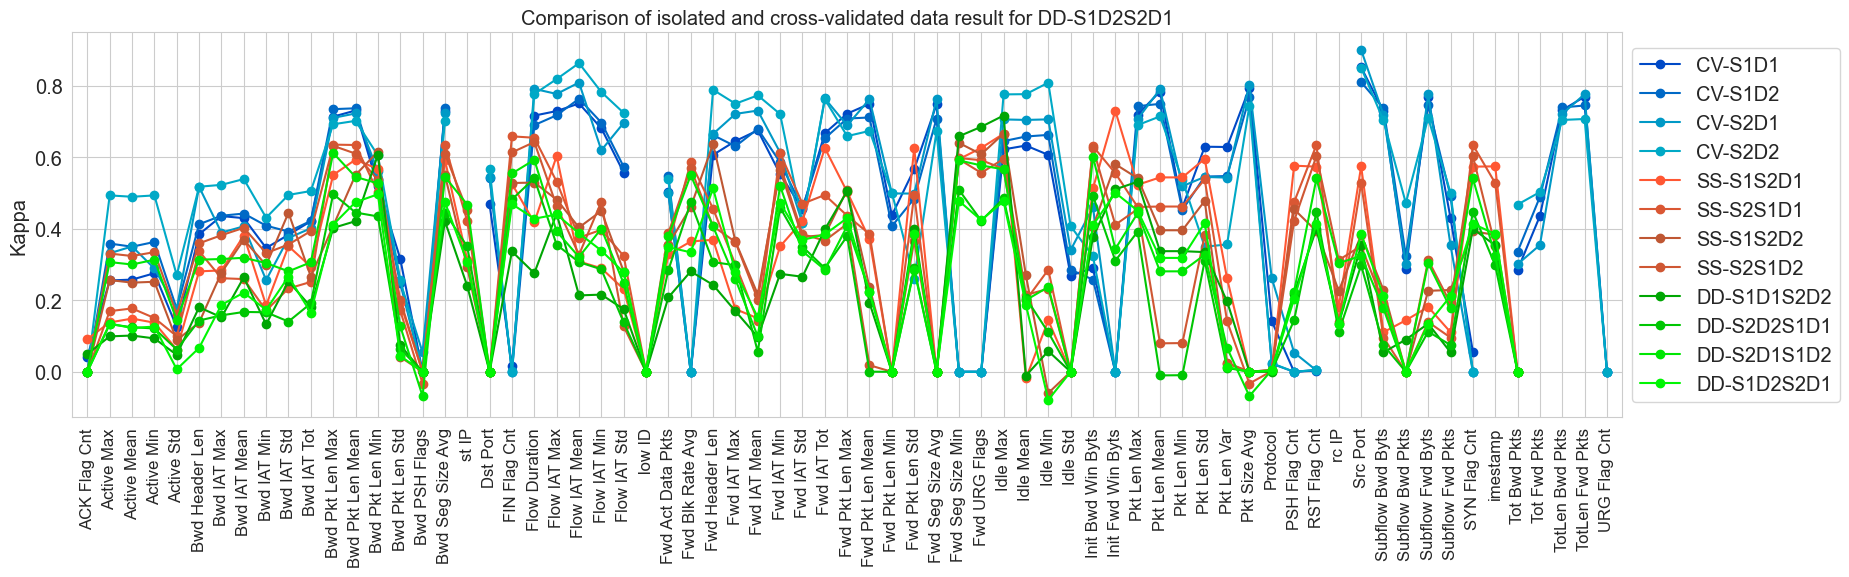

In [67]:
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
import matplotlib.pylab as pylab
sns.set_style("whitegrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
graph_size=80
for size in range(0,len(cleandf),graph_size):
    graph_name=f"./pdfs/kappa_line_12_{size}.PDF"
    df = cleandf.iloc[size:size+graph_size,:]
    for i in cols: 
            plt.margins(x=0.01)
            my_xticks=df["Feature"]#list(iso.index)
            pylab.rcParams.update(params)
            #plt.figure(figsize=(10,10))
            #plt.plot(my_xticks,iso['Acc'], linestyle='--', marker='.', color='b',label= "Separate Train & Test acc")
            #plt.plot(my_xticks,cv['Acc'], linestyle='--', marker='.', color='r',label= "10-Fold CV acc")
            plt.plot(my_xticks,df[i], linestyle='-', marker='o',color=colors[i],label= i)
    plt.title(f"Comparison of isolated and cross-validated data result for {i}")
    plt.legend(numpoints=1)
    #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.ylabel("Kappa")
    plt.xticks(rotation=90) 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.ylim([0.69, 0.71]) 
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
    
    

# Voting

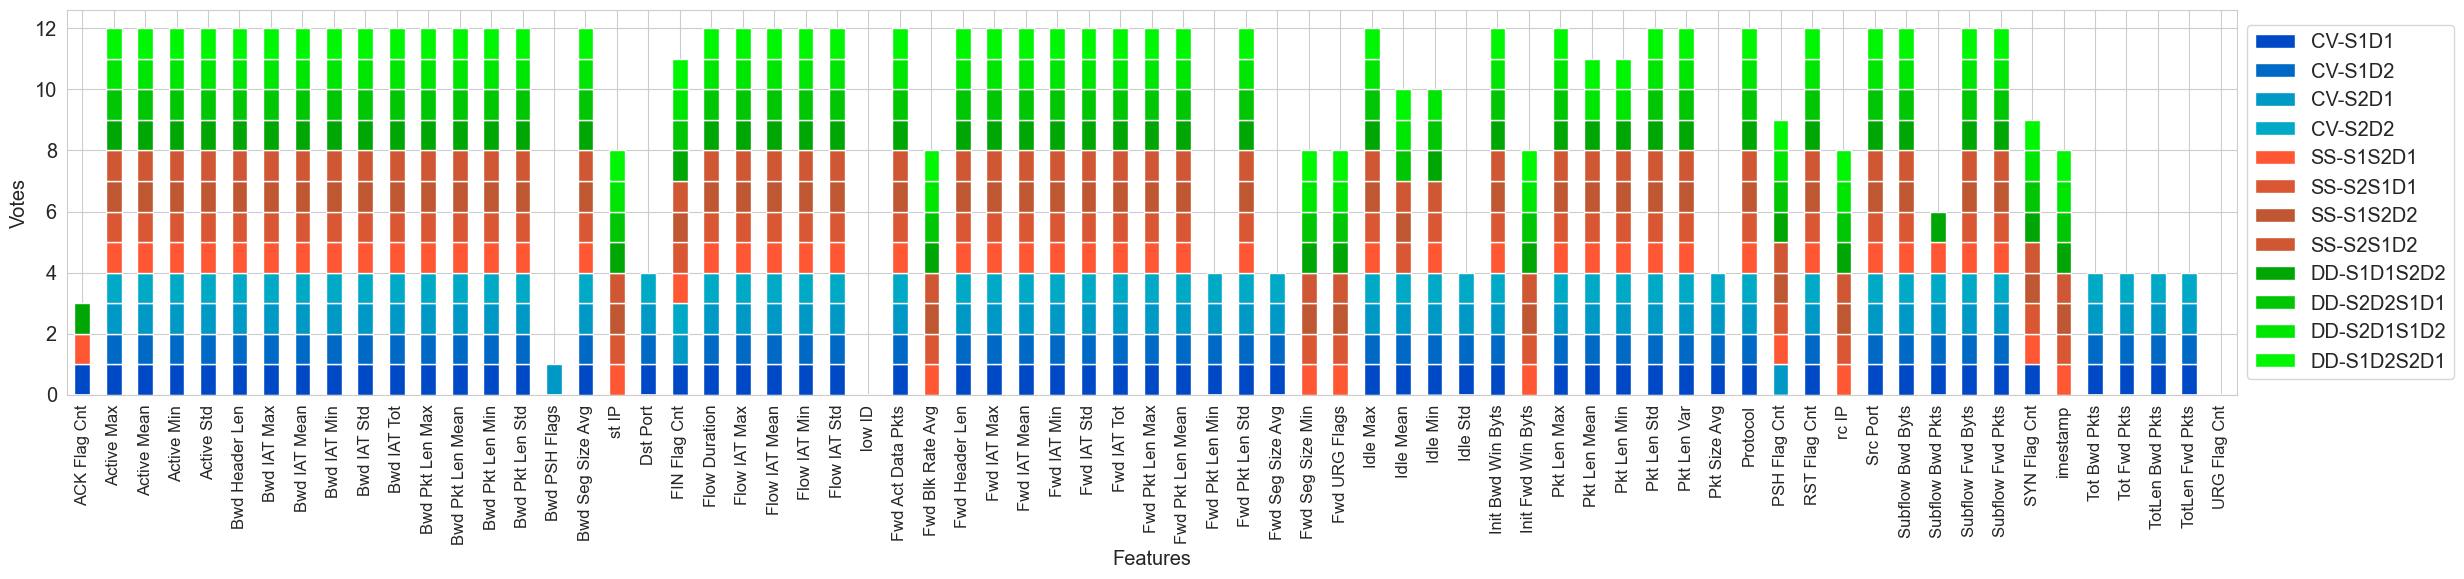

In [68]:
limit=0.00000001
for c in cleandf.columns[1:]:
    cleandf[c]=cleandf[c]>=limit
    cleandf[c]=cleandf[c].astype(int)
cleandf=cleandf.set_index("Feature")

graph_size=80
for size in range(0,len(cleandf),graph_size):
    graph_name=f"./pdfs/kappa_Voting12_{size}.PDF"
    df = cleandf.iloc[size:size+graph_size,:]
    df.plot.bar(stacked=True,figsize=(28,5),color=list(colors.values()))
    plt.xlabel('Features')
    plt.ylabel('Votes')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()

In [69]:
len(cleandf)

69

In [70]:
evalauated_features=[]
GA_input_features=[]
for ii,i in enumerate(cleandf.values):

    temp=sum(i[-4:])
    if temp:
        temp=sum(i[-8:])
        if temp>3:
            evalauated_features.append(1)
        else:
            evalauated_features.append(0)
    else:
        evalauated_features.append(0)
    print(cleandf.index[ii],i,evalauated_features[ii])
    if evalauated_features[ii]:
        GA_input_features.append(cleandf.index[ii])
        

ACK Flag Cnt [1 0 0 0 1 0 0 0 1 0 0 0] 0
Active Max [1 1 1 1 1 1 1 1 1 1 1 1] 1
Active Mean [1 1 1 1 1 1 1 1 1 1 1 1] 1
Active Min [1 1 1 1 1 1 1 1 1 1 1 1] 1
Active Std [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Header Len [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd IAT Max [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd IAT Mean [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd IAT Min [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd IAT Std [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd IAT Tot [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Pkt Len Max [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Pkt Len Mean [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Pkt Len Min [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Pkt Len Std [1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd PSH Flags [0 0 1 0 0 0 0 0 0 0 0 0] 0
Bwd Seg Size Avg [1 1 1 1 1 1 1 1 1 1 1 1] 1
st IP [0 0 0 0 1 1 1 1 1 1 1 1] 1
Dst Port [1 1 1 1 0 0 0 0 0 0 0 0] 0
FIN Flag Cnt [1 0 1 1 1 1 1 1 1 1 1 1] 1
Flow Duration [1 1 1 1 1 1 1 1 1 1 1 1] 1
Flow IAT Max [1 1 1 1 1 1 1 1 1 1 1 1] 1
Flow IAT Mean [1 1 1 1 1 1 1 1 1 1 1 1] 1
Flow IAT Min [1 1 1 1 1 1 1 1 1 1 1 1] 1
Flow IAT Std [1 

In [71]:
import pickle


with open('GA_input_features.pickle', 'wb') as handle:
    pickle.dump(GA_input_features, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('GA_input_features.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(GA_input_features == b)

True


In [72]:
len(GA_input_features)

55